In [ ]:
1.k近邻分类

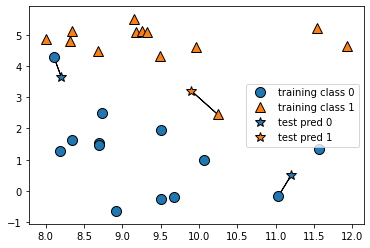

In [3]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
mglearn.plots.plot_knn_classification(n_neighbors=1)

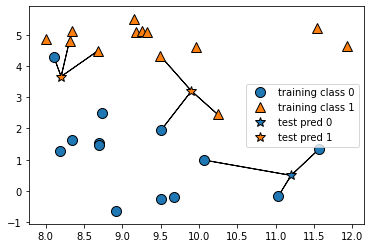

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [5]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [7]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
print("Test set predictions:{}".format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]


In [10]:
print("Test set accuracy:{:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy:0.86


In [ ]:
2.分析KNeighborsClassifier

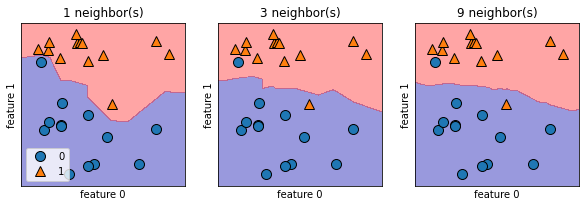

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    #fit方法返回对象本身，所以我们可以将实例化和拟合放在一行代码中
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [ ]:
3.k近邻回归

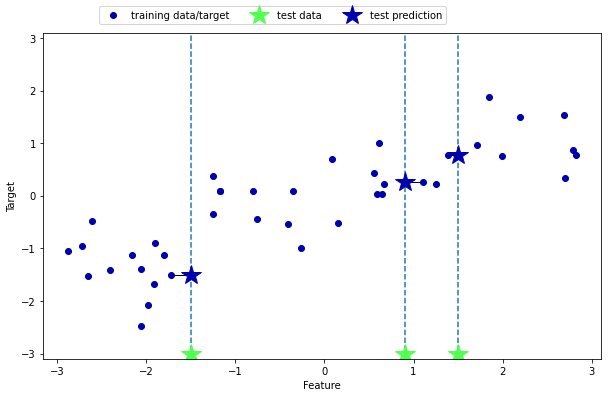

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

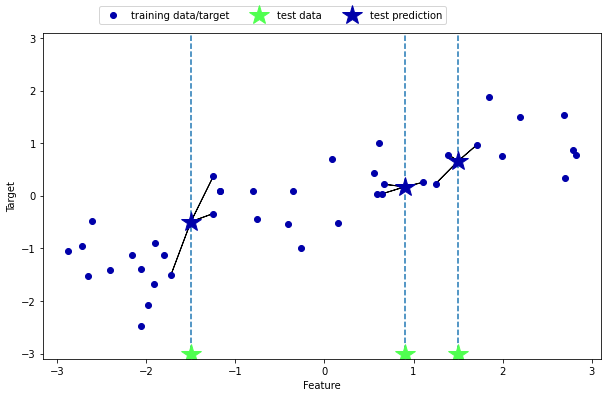

In [16]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [17]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

#将Wave数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#模型实例化，将邻居个数设为3
reg = KNeighborsRegressor(n_neighbors=3)
#利用训练数据和训练目标来拟合模型
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [20]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


In [ ]:
4.分析KNeighborsRegressor

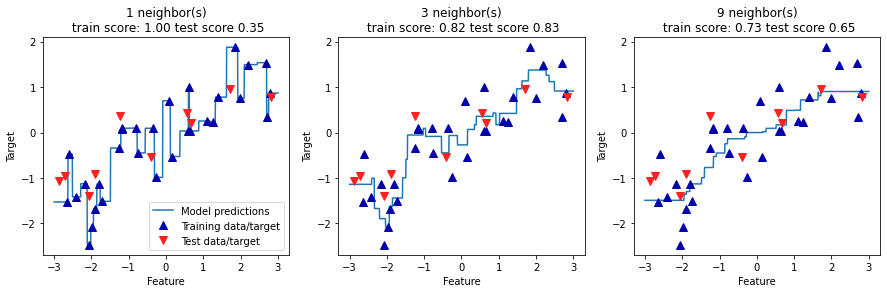

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

#创建1000个数据点，在-3和3之间均匀分布
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    #利用1个、3个或9个邻居分别进行预测
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")